## 1. Import libraries

In [1]:
! pip install sklearn

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## 2. Load the data set

In [3]:
df1 = pd.read_csv('6_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df1

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.397940
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.301030
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.782516
2618,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.698970
2619,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.125460
2620,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000


## 3. Input features

### 3.1 Input features

In [4]:
X = df1.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2618,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2619,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2620,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 3.2 Output features

In [5]:
Y = df1.pIC50
Y

0       6.522879
1       6.397940
2       7.000000
3       5.301030
4       7.000000
          ...   
2617    6.782516
2618    5.698970
2619    5.125460
2620    6.000000
2621    6.000000
Name: pIC50, Length: 2622, dtype: float64

 ### 3.3 Let's examine the data dimension

In [6]:
X.shape

(2622, 881)

In [7]:
Y.shape

(2622,)

### 3.4 Remove low variance features

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8*(1 - .8)))
X = selection.fit_transform(X)

In [9]:
X.shape

(2622, 154)

## 4. Data Split (80/20 ratio)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
X_train.shape, Y_train.shape

((2097, 154), (2097,))

In [12]:
X_test.shape, Y_test.shape

((525, 154), (525,))

## 5. Building a Regression Model using Random Forest

In [13]:
import numpy as np
np.random.seed(100)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.4885578370861775

In [14]:
Y_pred = model.predict(X_test)

## 6. Scatter plot of Experimental vs Predicted pIC50 Values

/home/rashid/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

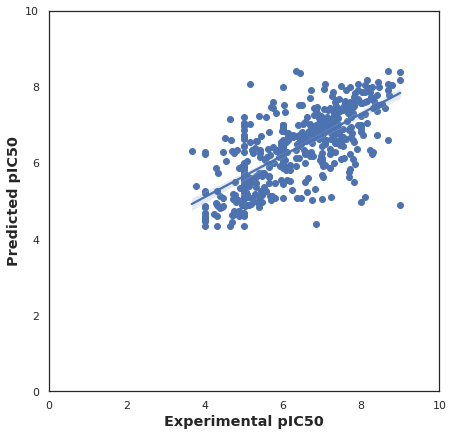

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':1.0})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.figure.set_size_inches(7, 7)
plt.savefig('Scatter plot of Experimental vs Predicted pIC50 Values')
plt.show